In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
import rdata
frequency = rdata.read_rda("data//fremotor1freq0304a.rda")
premium = rdata.read_rda("data//fremotor1prem0304a.rda")
severity = rdata.read_rda("data//fremotor1sev0304a.rda")
freq_df = frequency["fremotor1freq0304a"]
prem_df = premium["fremotor1prem0304a"]
sev_df = severity["fremotor1sev0304a"]
sev_df["OccurDate"] = pd.to_datetime(sev_df["OccurDate"], unit="D", origin="unix")
sev_df["OccurYear"] = sev_df["OccurDate"].dt.year
prem_df["DrivAgeBins"] = pd.cut(prem_df["DrivAge"],bins=20).map(lambda x: "(%s,%s]" % (x.left, x.right))

/opt/conda/lib/python3.12/site-packages/rdata/conversion/_conversion.py:856: UserWarning: Missing constructor for R class "Date". The underlying R object is returned instead.
  warnings.warn(


In [ ]:
mask = sev_df['Guarantee'] == 'Damage'
damage_df = sev_df.loc[mask,:]

<bound method DataFrame.count of               IDpol  OccurDate  Payment  IDclaim Guarantee  OccurYear
4     90109476.101a 2003-01-01     4373     6905    Damage       2003
12    90171000.100a 2003-01-01      496     6881    Damage       2003
19    90126684.102a 2003-01-02       84     6942    Damage       2003
25    90155997.100a 2003-01-02    24728     6930    Damage       2003
27    90168670.100a 2003-01-02       51    13032    Damage       2003
...             ...        ...      ...      ...       ...        ...
9198  90104222.101a 2004-12-26     1575    11967    Damage       2004
9205  90105102.100a 2004-12-27      861   205649    Damage       2004
9214  90114451.101c 2004-12-28     1363  1201452    Damage       2004
9227  90127080.101a 2004-12-29     1611   208129    Damage       2004
9244  90163026.100b 2004-12-30     5254   209251    Damage       2004

[953 rows x 6 columns]>

In [142]:
enriched_df = pd.merge(prem_df, damage_df, left_on=["IDpol","Year"], right_on=["IDpol","OccurYear"])
X = enriched_df.loc[:,["DrivAge","VehClass"]].values
y = enriched_df["Payment"]

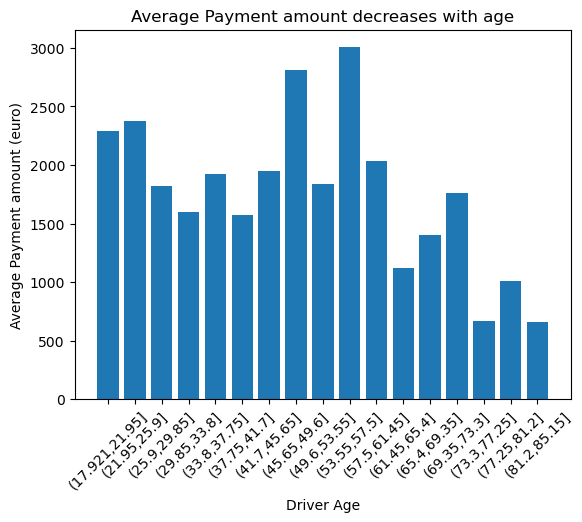

In [147]:
driv_age = enriched_df.pivot_table(index="DrivAgeBins",values="Payment",aggfunc="mean", observed=False).reset_index().copy()
fig, ax = plt.subplots()
ax.bar(x=driv_age["DrivAgeBins"], height=driv_age["Payment"])
ax.tick_params("x",rotation=45)
ax.set_xlabel("Driver Age")
ax.set_ylabel("Average Payment amount (euro)")
ax.set_title("Average Payment amount decreases with age")
plt.show()

/tmp/ipykernel_1790/267773157.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  veh_class = enriched_df.pivot_table(index="VehClass",values="Payment",aggfunc="mean").reset_index().copy()


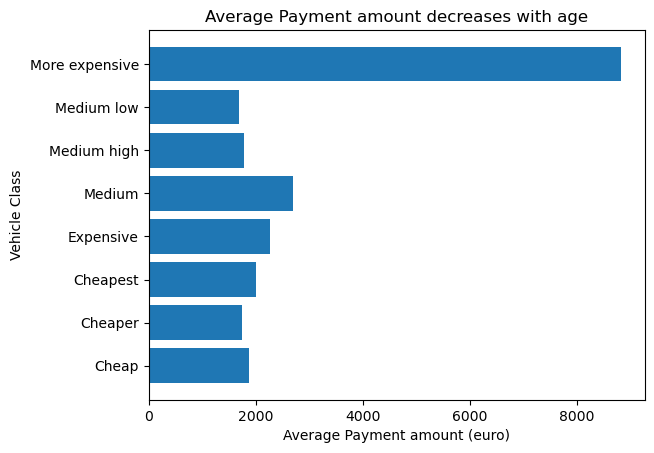

In [90]:
veh_class = enriched_df.pivot_table(index="VehClass",values="Payment",aggfunc="mean").reset_index().copy()
plt.barh(y=veh_class["VehClass"], width=veh_class["Payment"])
plt.ylabel("Vehicle Class")
plt.xlabel("Average Payment amount (euro)")
plt.title("Average Payment amount decreases with age")
plt.show()

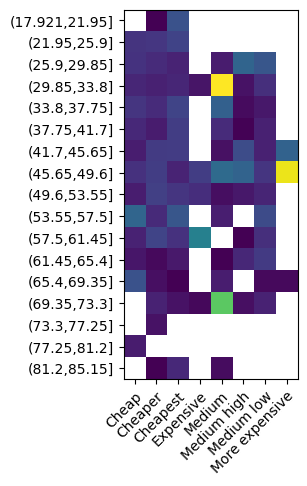

In [198]:
combo = enriched_df.pivot_table(index=["VehClass"], columns=["DrivAgeBins"],values="Payment",aggfunc="mean", observed=False).copy()
columns = []
for c in combo.columns:
    columns.append(combo[c].values)
column_labels = combo.columns.values
index_labels = combo.index.values
fig, ax = plt.subplots()
ax.imshow(columns)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(index_labels)), labels=index_labels,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(column_labels)), labels=column_labels)

# for i in range(len(column_labels)):
#     for j in range(len(index_labels)):
#         text = ax.text(j, i, columns[i][j],
#                        ha="center", va="center", color="w")

plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X)
clf = GradientBoostingClassifier(n_estimators=10, max_depth=1, random_state=0).fit(enc.transform(X), y)
clf.score(enc.transform(X),y)

0.16582278481012658

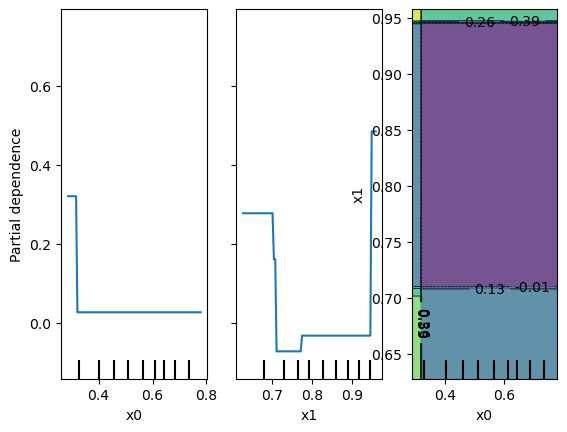

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = [0, 1, (0, 1)]
PartialDependenceDisplay.from_estimator(clf, transformer.transform(X), features, target=0)